# Sobre o notebook

Aproveite esse espaço para as atividades do curso de **Data Science: transformando variáveis para uma Regressão Linear** da Alura. Aqui você pode escrever e testar os códigos dos exercícios do **Mão na Massa** envolvendo os aprendizados de cada aula.

Sinta-se livre para adicionar mais células e ajustar da forma que você deseja!


Logo abaixo, temos a url onde está localizada a base que será utilizada neste projeto.
>**Atenção:** Esta base é diferente daquela que estamos utilizando nas aulas!

Observe abaixo os dados disponíveis em nossa base:

* **valor**: valor do aluguel da hospedagem para 2 diárias de até 4 pessoas em reais. Essa é a variável alvo que é o que se deseja prever de acordo com os atributos da propriedade;
* **area**: a área da hospedagem, medida em metros quadrados;
* **dist_praia**: distância da hospedagem até a praia mais próxima, em quilômetros;
* **dist_mercado**: distância da hospedagem até o mercado mais próximo, em quilômetros;
* **piscina**: variável binária que indica se a hospedagem possui ou não uma piscina. Pode ser representada como 1 para "sim" e 0 para "não".



In [1]:
url_hospedagens = "https://raw.githubusercontent.com/alura-cursos/data-science-regressao-linear/main/dados/hospedagens.csv"

## **Aula 01 - Análises preliminares**

### Mão na Massa - Explorando os dados

---



#### **Lendo e Explorando os dados**

In [2]:
import pandas as pd

In [3]:
dados = pd.read_csv(url_hospedagens)

In [4]:
dados.head()

,valor,area,dist_praia,dist_mercado,piscina
0,4600.0,280,0.241,0.794,1
1,900.0,208,0.904,0.134,1
2,2550.0,170,0.060,0.423,1
3,550.0,100,2.883,0.525,0
4,2200.0,164,0.240,0.192,0


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   valor         5000 non-null   float64
 1   area          5000 non-null   int64  
 2   dist_praia    5000 non-null   float64
 3   dist_mercado  5000 non-null   float64
 4   piscina       5000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 195.4 KB


#### **Entendendo a relação dos dados**

In [6]:
corr = dados.corr()
corr

,valor,area,dist_praia,dist_mercado,piscina
valor,1.000000,0.710974,-0.366543,-0.024377,0.294870
area,0.710974,1.000000,-0.283372,-0.030997,0.299858
dist_praia,-0.366543,-0.283372,1.000000,0.025650,-0.322888
dist_mercado,-0.024377,-0.030997,0.025650,1.000000,-0.004902
piscina,0.294870,0.299858,-0.322888,-0.004902,1.000000


In [7]:
corr['valor'].to_frame()

,valor
valor,1.000000
area,0.710974
dist_praia,-0.366543
dist_mercado,-0.024377
piscina,0.294870


> #### <strong><font color="#203f75" size= 6>Observações:</font></strong>

A variável independente **area** é a que apresenta a maior correlação com variável dependente **valor**. As distâncias possuem uma correlação negativa, quanto maior a distância entre o imóvel e estas variáveis, menor o preço. Quando existe uma piscina no imóvel seu preço da hospedagem tende a subir.

#### **Regressão linear com uma variável independente**

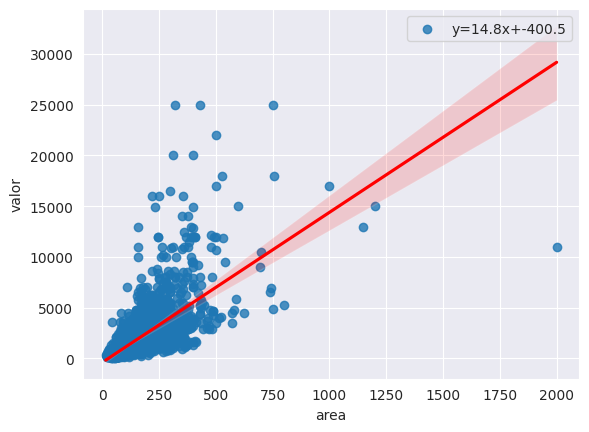

In [8]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

slope, intercept, rvalue, pvalue, stderr = stats.linregress(dados['area'], dados['valor'])

sns.set_style("darkgrid")
sns.regplot(x='area', y='valor', 
            data=dados, line_kws={'color':'red'}, 
            label=f"y={slope:.1f}x+{intercept:.1f}").legend(loc="best")
plt.show()

> #### <strong><font color="#203f75" size= 6>Observações:</font></strong>


Existe uma dificuldade de interpretar os dados com valores maiores, quanto maior a área, maior o erro da regressão.

## **Aula 02 - Análises gráficas**

### Mão na Massa - Investigando o comportamento das variáveis

#### **Comportamento da variável dependente**

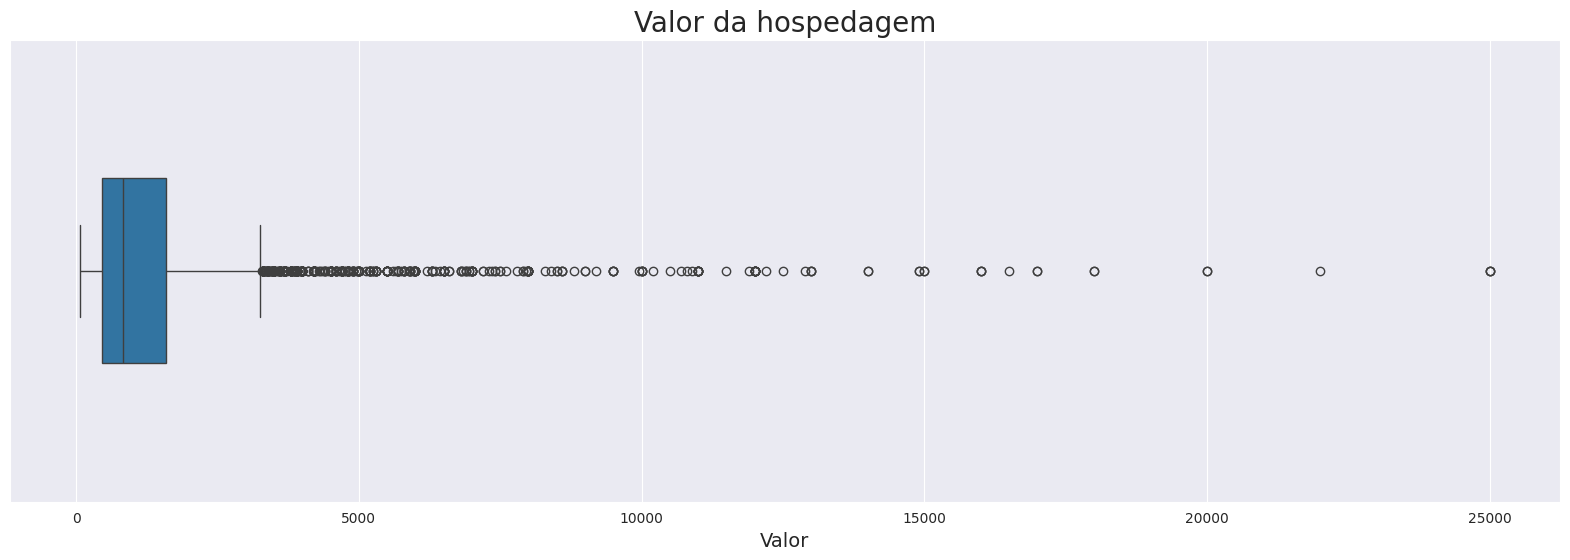

In [9]:
ax = sns.boxplot(x='valor', data=dados, width=0.4)
ax.figure.set_size_inches(20, 6)
ax.set_title("Valor da hospedagem", fontsize=20)
ax.set_xlabel("Valor", fontsize=14)
plt.show()

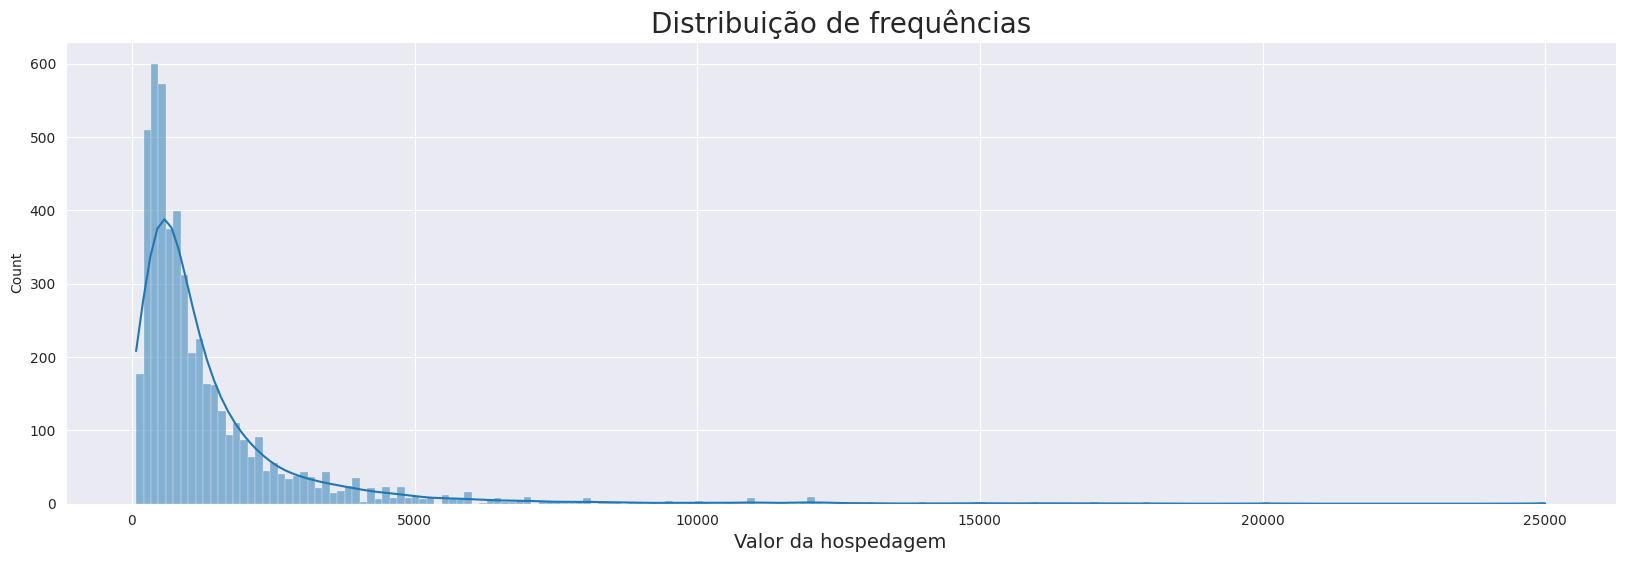

In [10]:
ax = sns.histplot(data=dados, x="valor", kde=True)
ax.figure.set_size_inches(20, 6)
ax.set_title("Distribuição de frequências", fontsize=20)
ax.set_xlabel("Valor da hospedagem", fontsize=14)
plt.show()

> #### <strong><font color="#203f75" size= 6>Observações:</font></strong>

É possível ver que a distribuição dos valores das hospedagens não seguem uma normal, não é simétrica, sendo assimétrica para direita.

### **Análise das variáveis explicativas em relação ao valor**

In [11]:
dados.columns

Index(['valor', 'area', 'dist_praia', 'dist_mercado', 'piscina'], dtype='object')

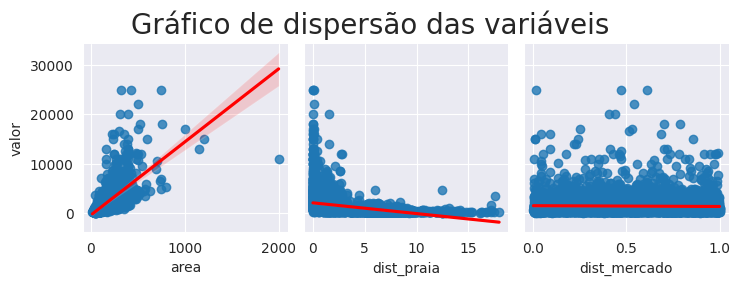

In [12]:
ax = sns.pairplot(data=dados, y_vars='valor', 
                  x_vars=['area', 'dist_praia', 'dist_mercado'],
                 kind='reg',
                 plot_kws={'line_kws':{'color': 'red'}} )
ax.figure.suptitle('Gráfico de dispersão das variáveis', fontsize=20, y=1.1)
plt.show()

In [13]:
corr['valor'].to_frame()

,valor
valor,1.000000
area,0.710974
dist_praia,-0.366543
dist_mercado,-0.024377
piscina,0.294870


> #### <strong><font color="#203f75" size= 6>Observações:</font></strong>

A variável **piscina** foi retirada na análise, pois se trata de uma variável binária. Como visto na correlação, a variável **dist_mercado** está muito próxima de 0, sendo assim não há uma correlação linear com o valor. A distribuição de **dist_praia** está mais para uma curvilínea do que uma linear.

## **Aula 03 - Transformação de variáveis**

### Mão na Massa - Transformando os dados e verificando suas relações

### **Transformando os dados**

In [14]:
dados.describe().round(3)

,valor,area,dist_praia,dist_mercado,piscina
count,5000.000,5000.000,5000.000,5000.000,5000.000
mean,1402.926,121.945,3.022,0.497,0.506
std,1883.269,90.537,3.171,0.291,0.500
min,75.000,16.000,0.000,0.000,0.000
25%,460.000,70.000,0.438,0.239,0.000
50%,820.000,93.000,1.477,0.503,1.000
75%,1590.000,146.000,5.606,0.748,1.000
max,25000.000,2000.000,17.963,1.000,1.000


In [15]:
import numpy as np

dados['log_valor'] = np.log(dados['valor'])
dados['log_area'] = np.log(dados['area'])
dados['log_dist_praia'] = np.log1p(dados['dist_praia'])
dados['log_dist_mercado'] = np.log1p(dados['dist_mercado'])

dados.head(3)

,valor,area,dist_praia,dist_mercado,piscina,log_valor,log_area,log_dist_praia,log_dist_mercado
0,4600.0,280,0.241,0.794,1,8.433812,5.634790,0.215918,0.584448
1,900.0,208,0.904,0.134,1,6.802395,5.337538,0.643957,0.125751
2,2550.0,170,0.060,0.423,1,7.843849,5.135798,0.058269,0.352767


> #### <strong><font color="#203f75" size= 6>Observações:</font></strong>

Foram alteradas as variáveis **valor, area, dist_praia, dist_mercado** afim de melhorar suas distribuições, a piscina não foi alterada pois se trata de uma variável binária.

### **Distribuição de frequências da variável dependente transformada**

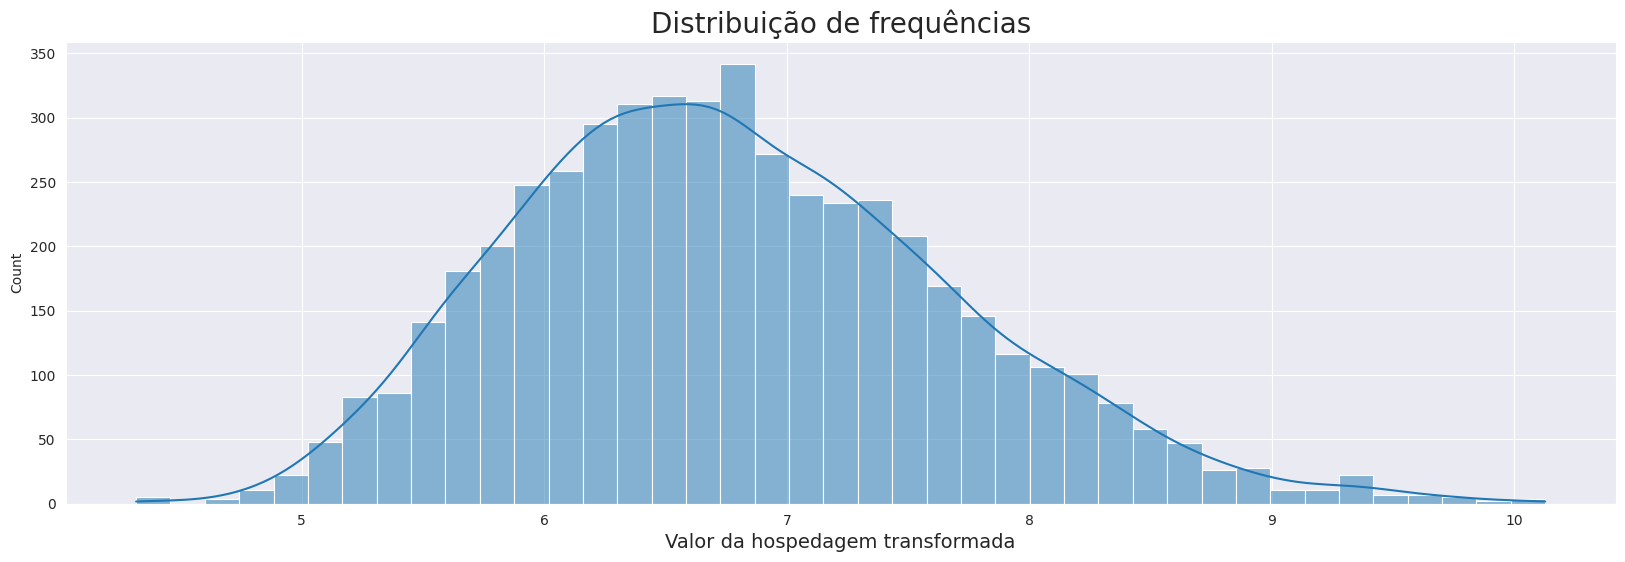

In [16]:
ax = sns.histplot(data=dados, x="log_valor", kde=True)
ax.figure.set_size_inches(20, 6)
ax.set_title("Distribuição de frequências", fontsize=20)
ax.set_xlabel("Valor da hospedagem transformada", fontsize=14)
plt.show()

> #### <strong><font color="#203f75" size= 6>Observações:</font></strong>

Aplicando a transformação logarítmica, a variável valor se aproxima mais de uma distribuição normal.

### **Análise das variáveis explicativas transformadas em relação ao valor**

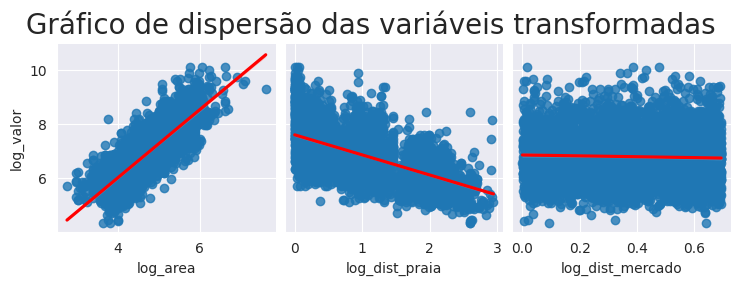

In [17]:
ax = sns.pairplot(data=dados, y_vars='log_valor', 
                  x_vars=['log_area', 'log_dist_praia', 'log_dist_mercado'],
                 kind='reg',
                 plot_kws={'line_kws':{'color': 'red'}} )
ax.figure.suptitle('Gráfico de dispersão das variáveis transformadas', fontsize=20, y=1.1)
plt.show()

> #### <strong><font color="#203f75" size= 6>Observações:</font></strong>

A variável area não apresenta mais a condição de explosão. A variável dist_praia se aproxima mais de uma relação linear com valor. A variável dist_mercado continua sendo um problema.

## **Aula 04 - Regressão linear múltipla**

### Mão na Massa - Preparando os dados e treinando o modelo

### **Dividindo os dados em treino e teste**

In [19]:
from sklearn.model_selection import train_test_split

In [34]:
y = dados['log_valor']
X = dados[['log_area', 'log_dist_praia', 'log_dist_mercado', 'piscina']]
X

,log_area,log_dist_praia,log_dist_mercado,piscina
0,5.634790,0.215918,0.584448,1
1,5.337538,0.643957,0.125751,1
2,5.135798,0.058269,0.352767,1
3,4.605170,1.356608,0.421994,0
4,5.099866,0.215111,0.175633,0
...,...,...,...,...
4995,4.248495,0.391366,0.561329,1
4996,4.852030,2.261138,0.314811,0
4997,4.248495,0.225541,0.351361,0
4998,4.007333,2.297070,0.519389,1


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1991)

### **Estimando modelo de regressão linear e avaliando as estatísticas do modelo**

In [36]:
import statsmodels.api as sm

In [37]:
X_train_com_constante = sm.add_constant(X_train)

In [38]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst=True).fit()
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_valor   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     3741.
Date:                Wed, 28 Aug 2024   Prob (F-statistic):               0.00
Time:                        12:45:48   Log-Likelihood:                -1695.6
No. Observations:                3500   AIC:                             3401.
Df Residuals:                    3495   BIC:                             3432.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.5687      0.064  

> #### <strong><font color="#203f75" size= 6>Observações:</font></strong>

Precisamos retirar a variável **log_dist_mercado**, pois ela falha no teste de significância, tendo seu valor em **P>|t|** muito maior que 0.05.

### **Treinando o modelo**

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [40]:
X_train_novo = X_train.drop('log_dist_mercado', axis=1)
X_test_novo = X_test.drop('log_dist_mercado', axis=1)

In [41]:
modelo = LinearRegression()

In [42]:
modelo.fit(X_train_novo, y_train)

LinearRegression()

In [43]:
y_previsto = modelo.predict(X_test_novo)

In [44]:
print(f"R² = {modelo.score(X_train_novo, y_train).round(3)}")

R² = 0.811


In [45]:
print(f"R² = {metrics.r2_score(y_test, y_previsto).round(3)}")

R² = 0.808


### **Precificando uma hospedagem**

<img src="https://github.com/afonsosr2/data-science-regressao-linear/blob/main/imagens/quanto_custa_slide_2.png?raw=true" alt="Imagem de uma casa e suas características para precificação" width=720>

In [46]:
modelo.feature_names_in_

array(['log_area', 'log_dist_praia', 'piscina'], dtype=object)

In [47]:
nova_hospedagem = pd.DataFrame({'log_area': [np.log(100)],
                                'log_dist_praia': [np.log1p(0)],
                                'piscina': [1]})

In [48]:
print(f"R$ {np.exp(modelo.predict(nova_hospedagem)[0]):,.2f}")

R$ 1,564.97


## **Aula 05 - Entendendo os resultados**

### Mão na Massa - Interpretando os coeficientes do modelo e prevendo mais hospedagens

### **Obtendo o intercepto e coeficientes**

### **Interpretando os coeficientes**

**Intercepto →** Excluindo o efeito de todas as variáveis explicativas, o efeito médio no Valor da Hospedagem, seria de **R$ ???**. (exp[???])

**Área da hospedagem (m²)** → Mantendo-se os valores de todas as outras variáveis explicativas constantes, um acréscimo de 1% na Área da hospedagem gera, em média, um **acréscimo/decréscimo de ???** no Valor da Hospedagem.

**Distância até a praia (km)** → Mantendo-se os valores de todas as outras variáveis explicativas constantes, um acréscimo de 1% na Distância até a praia gera, em média, um **acréscimo/decréscimo de ???** no Valor da Hospedagem.



> #### <strong><font color="#203f75" size= 6>Observações:</font></strong>

Adicione aqui suas hipóteses e interpretações dos dados!

### **Analisando graficamente os resultados do modelo**

> #### <strong><font color="#203f75" size= 6>Observações:</font></strong>

Adicione aqui suas hipóteses e interpretações dos dados!

> #### <strong><font color="#203f75" size= 6>Observações:</font></strong>

Adicione aqui suas hipóteses e interpretações dos dados!

### **Aplicando o modelo para precificar mais hospedagens**

In [18]:
# Hospedagens a precificar:
hospedagens = pd.DataFrame({
    'area': [460, 360, 220, 500, 150, 280, 460, 260, 300, 180],
    'dist_praia': [5.5, 2.0 , 4.0 , 1.5, 1.0 , 6.0 , 3.0 , 1.0 , 0.5, 6.0 ],
    'piscina': [1, 0, 0, 1, 0, 0, 1, 0, 0, 1] })
hospedagens

,area,dist_praia,piscina
0,460,5.5,1
1,360,2.0,0
2,220,4.0,0
3,500,1.5,1
4,150,1.0,0
5,280,6.0,0
6,460,3.0,1
7,260,1.0,0
8,300,0.5,0
9,180,6.0,1
